In [30]:
import matplotlib.pyplot as plt
import numpy as np
import vegas
import random as rand

m_W = 80.379
m_Z = 91.1876
sin_sq = 1 - (m_W / m_Z) ** 2 # dimensionless
m_t = 173.1
m_h = 125.1
G_F = 1.663787E-5 # GeV^(-2)
alpha = 1 / 132.184
e = (4 * np.pi * alpha) ** 0.5
m_e = 0.511E-3
m_m = 105.66E-3
ECM = m_h
hats = ECM ** 2 # all quantities are in GeV
pb_convert = 3.894E8 # conversion factor GeV^-2 -> pb

def diff_decay(s, t, m):
    N = (e ** 4 * m ** 2) / (256 * np.pi ** 3 * sin_sq * m_W ** 2 * m_h ** 3)
    u = m_h ** 2 + 2 * m ** 2 - s - t
    den_1 = (t - m ** 2)
    den_2 = (u - m ** 2)
    p_1 = (9 * m ** 4 + m ** 2 * (-2 * s + t - 3 * u) + t * u) / den_1 ** 2
    p_2 = (9 * m ** 4 + m ** 2 * (-2 * s + u - 3 * t) + t * u) / den_2 ** 2
    p_3 = (34 * m ** 4 - 2 * m ** 2 * (8 * s + 5 * (u + t)) + 2 * (s + t) * (s + u)) / (den_1 * den_2)
    return N * (p_1 + p_2 + p_3)

def d_t(m, x):
    return (m_h ** 2 - x) * (1 - 4 * (m ** 2 / x)) ** 0.5

def t_max(s, m):
    return 0.5 * (m_h ** 2 - s + 2 * m ** 2 + (m_h ** 2 - s) * (1 - (4 * m ** 2) / s) ** 0.5) 

def t_min(s, m):
    return 0.5 * (m_h ** 2 - s + 2 * m ** 2 - (m_h ** 2 - s) * (1 - (4 * m ** 2) / s) ** 0.5) 

def s_func_max(m, t):
    return (-t**2+m_h**2*t+2*m**2*t+m_h**2*m**2-m**4+(t**4-2*m_h**2*t**3-4*m**2*t**3+m_h**4*t**2
    +6*m**4*t**2+2*m_h**2*m**2*t**2-4*m**6*t+2*m_h**2*m**4*t-2*m_h**4*m**2*t+m**8-2*m_h**2*m**6+m_h**4*m**4)**0.5)/(2*t)

def s_func_min(m, t):
    return (-t**2+m_h**2*t+2*m**2*t+m_h**2*m**2-m**4-(t**4-2*m_h**2*t**3-4*m**2*t**3+m_h**4*t**2
    +6*m**4*t**2+2*m_h**2*m**2*t**2-4*m**6*t+2*m_h**2*m**4*t-2*m_h**4*m**2*t+m**8-2*m_h**2*m**6+m_h**4*m**4)**0.5)/(2*t)

def E_l(m, u):
    return (m_h ** 2 + m ** 2 - u) / (2 * m_h)

def E_lbar(m, t):
    return (m_h ** 2 + m ** 2 - t) / (2 * m_h)

def E_phot(m, s):
    return (m_h ** 2 - s) / (2 * m_h)

def mom_l(E, m):
    mod = (E ** 2 - m ** 2) ** 0.5
    vec = mod * np.array([0, 0, 1])
    return vec

def mom_lbar(E_m, E_p, m, s, phi):
    mod = (E_p ** 2 - m ** 2) ** 0.5
    cos_th  = (m ** 2 + E_m * E_p - 0.5 * s) / ((E_m ** 2 - m ** 2) * (E_p ** 2 - m ** 2)) ** 0.5
    sin_th = (1 - cos_th ** 2) ** 0.5
    vec = mod * np.array([sin_th * np.cos(phi), sin_th * np.sin(phi), cos_th])
    return vec

def mom_phot(p_mvec, p_pvec):
    return - p_mvec - p_pvec

def cos_ll(m, E_u, E_t, s):
    n = m ** 2 + E_u * E_t - 0.5 * s
    d = (E_u ** 2 - m ** 2) ** 0.5 * (E_t ** 2 - m ** 2) ** 0.5
    return n / d

def cos_lk(m, E_u, E_s, t):
    n = m ** 2 - t + 2 * E_u * E_s
    d = 2 * E_s * (E_u ** 2 - m ** 2) ** 0.5 
    return n / d

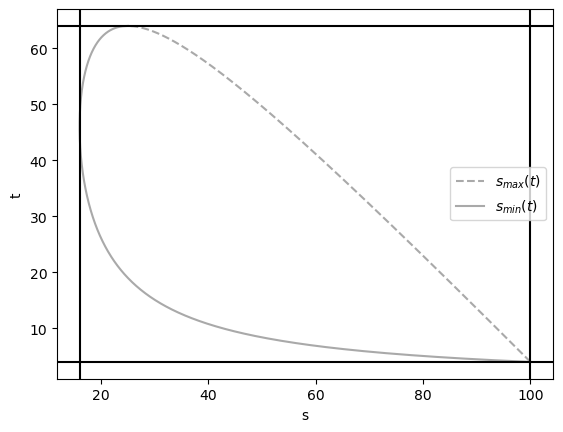

In [2]:
m_h = 10
m = 2

delta = 1 * m ** 2 #as to not create zero is t fns
t_min_fix = m ** 2 + delta
t_max_fix = (m_h - m) ** 2 - delta
s_max_fix = s_func_max(m, t_min_fix)
s_min_fix = s_func_min(m, t_max_fix)

tp = np.linspace(m ** 2, (m_h - m) ** 2, 1000)
sp = np.linspace(4 * m ** 2, m_h ** 2, 1000)
plt.plot(s_func_max(2, tp), tp, color = 'darkgray', label = r'$s_{max}(t)$', linestyle = 'dashed')
plt.plot(s_func_min(2, tp), tp, color = 'darkgray', label = r'$s_{min}(t)$')
#plt.plot(sp, t_max(sp, m), color = 'darkgray', label = r'$t_{max}(s)$', linestyle = 'dashed')
#plt.plot(sp, t_min(sp, m), color = 'darkgray', label = r'$t_{min}(s)$')

plt.axhline(m ** 2, color = 'k')
plt.axhline((m_h - m) ** 2, color = 'k')
plt.axvline(4 * m ** 2, color = 'k')
plt.axvline(m_h ** 2, color = 'k')

plt.xlabel('s')
plt.ylabel('t')
plt.legend()
plt.plot()
plt.show()

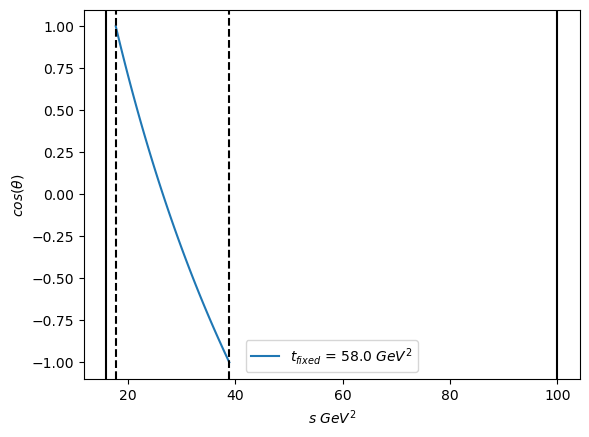

In [25]:
m_h = 10 ### ll angle
m = 2

t_pick = m ** 2 + 0.9 * ((m_h - m) ** 2 - m ** 2)
s_vals = np.linspace(s_func_min(m, t_pick), s_func_max(m, t_pick), 100)
u = m_h ** 2 + 2 * m ** 2 - s_vals - t_pick
E_u = E_l(m, u)
E_t = E_lbar(m, t_pick)
vals = cos_ll(m, E_u, E_t, s_vals)
plt.xlabel(r'$s$ $GeV^{2}$')
plt.ylabel(r'$cos(\theta)$')
plt.plot(s_vals, vals, label = r'$t_{fixed}$ = '+str(t_pick)+' $GeV^{2}$')
plt.axvline(s_func_min(m, t_pick), color = 'k', linestyle = 'dashed')
plt.axvline(s_func_max(m, t_pick), color = 'k', linestyle = 'dashed')
plt.axvline(4 * m ** 2, color = 'k')
plt.axvline(m_h ** 2, color = 'k')
plt.legend()
plt.show()

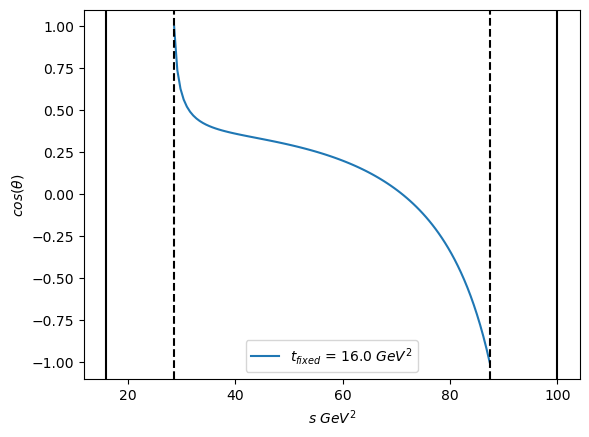

In [3]:
m_h = 10 ### lk angle
m = 2

t_pick = m ** 2 + 0.2 * ((m_h - m) ** 2 - m ** 2)
s_vals = np.linspace(s_func_min(m, t_pick), s_func_max(m, t_pick), 100)
u = m_h ** 2 + 2 * m ** 2 - s_vals - t_pick
E_u = E_l(m, u)
E_s = E_phot(m, s_vals)
vals = cos_lk(m, E_u, E_s, t_pick)
plt.xlabel(r'$s$ $GeV^{2}$')
plt.ylabel(r'$cos(\theta)$')
plt.plot(s_vals, vals, label = r'$t_{fixed}$ = '+str(t_pick)+' $GeV^{2}$')
plt.axvline(s_func_min(m, t_pick), color = 'k', linestyle = 'dashed')
plt.axvline(s_func_max(m, t_pick), color = 'k', linestyle = 'dashed')
plt.axvline(4 * m ** 2, color = 'k')
plt.axvline(m_h ** 2, color = 'k')
plt.legend()
plt.show()

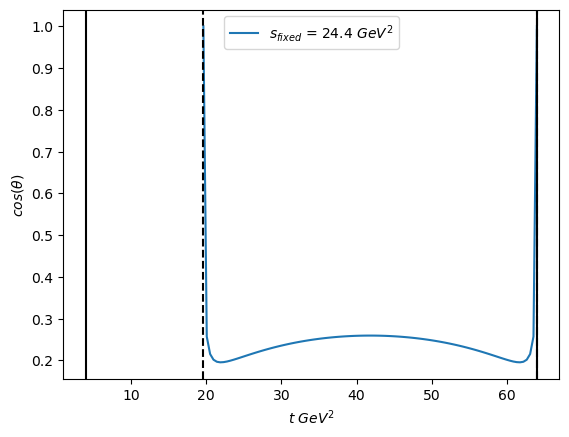

In [60]:
m_h = 10
m = 2

s_pick = 4 * m ** 2 + 0.10 * (m_h ** 2 - 4 * m ** 2)
t_vals = np.linspace(t_min(s_pick, m), t_max(s_pick, m), 100)
u_alt = m_h ** 2 + 2 * m ** 2 - s_pick - t_vals
E_u = E_l(m, u_alt)
E_t = E_lbar(m, t_vals)
vals_alt = cos_ll(m, E_u, E_t, s_pick
plt.xlabel(r'$t$ $GeV^{2}$')
plt.ylabel(r'$cos(\theta)$')
plt.plot(t_vals, vals_alt, label = r'$s_{fixed}$ = '+str(s_pick)+' $GeV^{2}$')
plt.axvline(m ** 2, color = 'k')
plt.axvline((m_h - m) ** 2, color = 'k')
plt.axvline(t_min(s_pick, m), color = 'k', linestyle = 'dashed')
plt.axvline(t_max(s_pick, m), color = 'k', linestyle = 'dashed')
plt.legend()
plt.show()

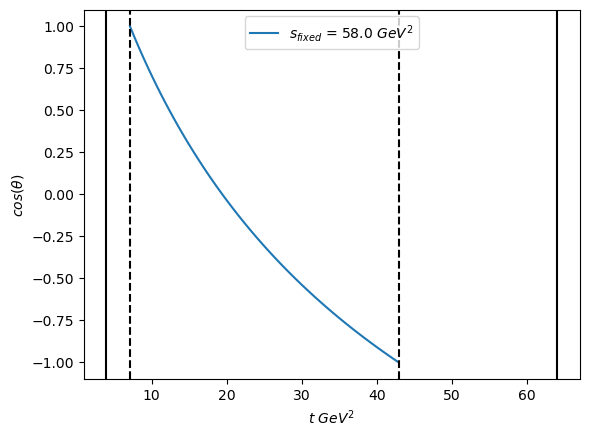

In [8]:
m_h = 10 ### lk angle
m = 2

s_pick = 4 * m ** 2 + 0.5 * (m_h ** 2 - 4 * m ** 2)
t_vals = np.linspace(t_min(s_pick, m), t_max(s_pick, m), 100)
u_alt = m_h ** 2 + 2 * m ** 2 - s_pick - t_vals
E_u = E_l(m, u_alt)
E_s = E_phot(m, s_pick)
vals_alt = cos_lk(m, E_u, E_s, t_vals)
plt.xlabel(r'$t$ $GeV^{2}$')
plt.ylabel(r'$cos(\theta)$')
plt.plot(t_vals, vals_alt, label = r'$s_{fixed}$ = '+str(s_pick)+' $GeV^{2}$')
plt.axvline(m ** 2, color = 'k')
plt.axvline((m_h - m) ** 2, color = 'k')
plt.axvline(t_min(s_pick, m), color = 'k', linestyle = 'dashed')
plt.axvline(t_max(s_pick, m), color = 'k', linestyle = 'dashed')
plt.legend()
plt.show()

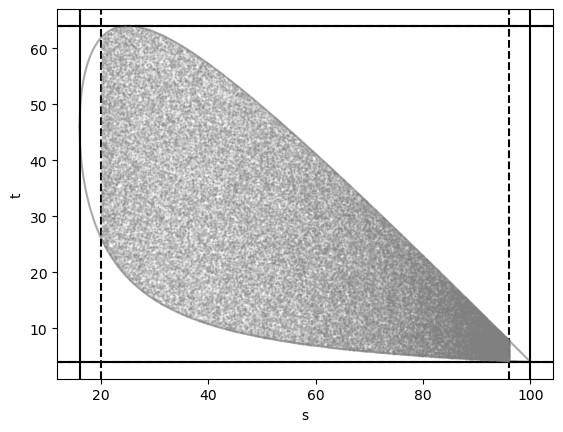

In [42]:
m_h = 10
m = 2

delta = 4
s_min_fix = 4 * m ** 2 + delta
s_max_fix = m_h ** 2 - delta
#t_min_fix = t_min(s_max_fix, m)
#t_max_fix = t_max(s_min_fix, m)
t_min_fix = m ** 2
t_max_fix = (m_h - m) ** 2

ss = []
ts = []
for i in range(0, 100000):
    x_0 = rand.random()
    x_1 = rand.random()
    s_subs = s_min_fix + (s_max_fix - s_min_fix) * x_1
    t_subs = t_min(s_subs, m) + (t_max(s_subs, m) - t_min(s_subs, m)) * x_0
    if t_subs < t_max_fix and t_subs > t_min_fix:
        ts += [t_subs]
        ss += [s_subs] 
       
tp = np.linspace(m ** 2, (m_h - m) ** 2, 1000)
sp = np.linspace(4 * m ** 2, m_h ** 2, 1000)
plt.plot(sp, t_max(sp, m), color = 'darkgray')
plt.plot(sp, t_min(sp, m), color = 'darkgray')

plt.axhline(t_min_fix, color = 'black', linestyle = 'dashed')
plt.axhline(t_max_fix, color = 'black', linestyle = 'dashed')
plt.axvline(s_min_fix, color = 'black', linestyle = 'dashed')
plt.axvline(s_max_fix, color = 'black', linestyle = 'dashed')
plt.axhline(m ** 2, color = 'black')
plt.axhline((m_h - m) ** 2, color = 'black')
plt.axvline(4 * m ** 2, color = 'black')
plt.axvline(m_h ** 2, color = 'black')

plt.xlabel('s')
plt.ylabel('t')
plt.plot(ss, ts, marker = '.', markersize = 1, ls = 'None', alpha = 0.2, color = 'gray')
#plt.legend()
plt.show()

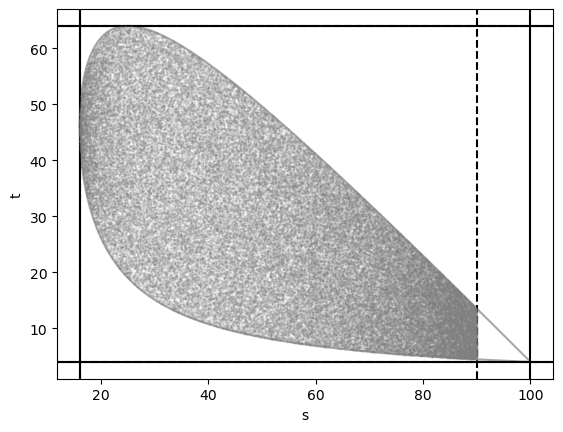

In [29]:
m_h = 10
m = 2

E_phot_min = 0.5
s_min_fix = 4 * m ** 2
s_max_fix = m_h ** 2 - 2 * m_h * E_phot_min
t_min_fix = m ** 2
t_max_fix = (m_h - m) ** 2
#print(t_min_fix, t_max_fix, s_min_fix, s_max_fix, 4 * m ** 2 /s_min_fix)

ss = []
ts = []
for i in range(0, 100000):
    x_0 = rand.random()
    x_1 = rand.random()
    s_subs = s_min_fix + (s_max_fix - s_min_fix) * x_1
    t_subs = t_min(s_subs, m) + (t_max(s_subs, m) - t_min(s_subs, m)) * x_0
    #print(t_subs)
    if t_subs < t_max_fix and t_subs > t_min_fix:
        ts += [t_subs]
        ss += [s_subs] 
       
tp = np.linspace(m ** 2, (m_h - m) ** 2, 1000)
sp = np.linspace(4 * m ** 2, m_h ** 2, 1000)
plt.plot(sp, t_max(sp, m), color = 'darkgray')
plt.plot(sp, t_min(sp, m), color = 'darkgray')

plt.axhline(t_min_fix, color = 'black', linestyle = 'dashed')
plt.axhline(t_max_fix, color = 'black', linestyle = 'dashed')
plt.axvline(s_min_fix, color = 'black', linestyle = 'dashed')
plt.axvline(s_max_fix, color = 'black', linestyle = 'dashed')
plt.axhline(m ** 2, color = 'black')
plt.axhline((m_h - m) ** 2, color = 'black')
plt.axvline(4 * m ** 2, color = 'black')
plt.axvline(m_h ** 2, color = 'black')

plt.xlabel('s')
plt.ylabel('t')
plt.plot(ss, ts, marker = '.', markersize = 1, ls = 'None', alpha = 0.2, color = 'gray')
#plt.legend()
plt.show()

In [31]:
delta = 0.00000000001 #as to not create zero is t fns
t_min_fix = m_m ** 2 + delta
t_max_fix = (m_h - m_m) ** 2 - delta
s_max_fix = s_func_max(m_m, t_min_fix)
s_min_fix = s_func_min(m_m, t_max_fix)
print(s_min_fix, s_max_fix, 4 * m_m ** 2, m_h ** 2)
print(t_min_fix, t_max_fix, m_m ** 2, (m_h - m_m) ** 2)
#print((s_max_fix - s_min_fix) / 100)

13.229197373657634 15650.010078414676 0.0446561424 15650.009999999998
0.011164035610000001 15623.58503203559 0.0111640356 15623.585032035598


In [107]:
E_phot_min = 5
s_min_fix = 4 * m_m ** 2
s_max_fix = m_h ** 2 - 2 * m_h * E_phot_min
t_min_fix = t_min(s_max_fix, m_m)
t_max_fix = (m_h - m_m) ** 2
print(s_min_fix, s_max_fix, 4 * m_m ** 2, m_h ** 2)
print(t_min_fix, t_max_fix, m_m ** 2, (m_h - m_m) ** 2)

0.0446561424 14399.009999999998 0.0446561424 15650.009999999998
0.012133978628298792 15623.585032035598 0.0111640356 15623.585032035598


In [45]:
delta = 0.1
s_min_fix = 4 * m_m ** 2 + delta
s_max_fix = m_h ** 2 - delta
t_min_fix = m_m ** 2
t_max_fix = (m_h - m_m) ** 2
print(s_min_fix, s_max_fix, 4 * m_m ** 2, m_h ** 2)
print(t_min_fix, t_max_fix, m_m ** 2, (m_h - m_m) ** 2)

0.14465614240000002 15649.909999999998 0.0446561424 15650.009999999998
0.0111640356 15623.585032035598 0.0111640356 15623.585032035598


In [ ]:
E_phot_min = 5
s_max_fix = m_h ** 2 - 2 * m_h * E_phot_min
s_min_fix = (0.1 * m_h) ** 2
t_min_fix = t_min(s_max_fix, m_m)
t_max_fix = t_max(s_min_fix, m_m)

In [ ]:
#delta = 0.1
#s_min_fix = 4 * m_m ** 2 + delta
#s_max_fix = m_h ** 2 - delta
#t_min_fix = m_m ** 2
#t_max_fix = (m_h - m_m) ** 2
E_phot_min = 5
s_min_fix = (0.1 * m_h) ** 2
s_max_fix = m_h ** 2 - 2 * m_h * E_phot_min
t_min_fix = m_m ** 2
t_max_fix = (m_h - m_m) ** 2
nitns = 20
nevals = 10 ** 5
bins = 100

def total_s(x):
    s_subs = s_min_fix + (s_max_fix - s_min_fix) * x[1] #primed
    t_subs = t_min(s_subs, m_m) + (t_max(s_subs, m_m) - t_min(s_subs, m_m)) * x[0] #unprimed
    u = m_h ** 2 + 2 * m_m ** 2 - s_subs - t_subs
    
    dI = np.zeros(bins, dtype=float) 
    dr = (s_max_fix - s_min_fix) / len(dI)
    dI_t = np.zeros(bins, dtype=float) 
    dr_t = (t_max_fix - t_min_fix) / len(dI)
    dI_cos = np.zeros(bins, dtype=float) 
    dr_cos = 2 / len(dI_cos) 
    dI_cos_alt = np.zeros(bins, dtype=float)
    dr_cos_alt = 2 / len(dI_cos_alt)
    
    if t_subs < t_max_fix and t_subs > t_min_fix:
        I = (s_max_fix - s_min_fix) * (t_max(s_subs, m_m) - t_min(s_subs, m_m)) * diff_decay(s_subs, t_subs, m_m)
        
        j = int((s_subs - s_min_fix) / dr)
        dI[j] = I
        j_t = int((t_subs - t_min_fix) / dr_t)
        dI_t[j_t] = I
        j_cos = int((cos_lk(m_m, E_l(m_m, u), E_phot(m_m, s_subs), t_subs) + 1) / dr_cos) 
        dI_cos[j_cos] = I
        j_cos_alt = int((cos_ll(m_m, E_l(m_m, u), E_lbar(m_m, t_subs), s_subs) + 1) / dr_cos_alt)
        dI_cos_alt[j_cos_alt] = I
        
    else:
        I = 0
   
    return dict(I=I, dI=dI, dI_t=dI_t, dI_cos=dI_cos, dI_cos_alt=dI_cos_alt)

total_decay_integ = vegas.Integrator([[0, 1], [0, 1]])
total_rate = total_decay_integ(total_s, nitn = nitns, neval = nevals)
print(total_rate.summary())
print('Sum(dI/I) =', sum(total_rate['dI']) / total_rate['I']) #should be 1

computed = total_rate['I'].mean
error = total_rate['I'].sdev
print('Vegas Cross-Section = '+str(computed)+' +/ '+str(error)+'')

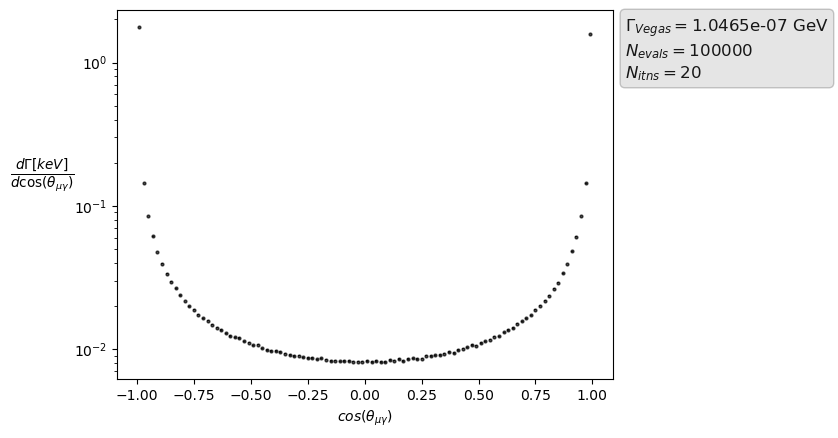

In [32]:
dIs = []
dI_errs = []

cos_s = []
for i in range(0, bins):
    cos_s += [-1 + (i + 0.5) * 2 / bins]
    
for i in range(0, bins):
    dIs += [total_rate['dI_cos'][i].mean]
    dI_errs += [total_rate['dI_cos'][i].sdev]
    
norm = 2 / bins
keV = 10 ** 6

fig, ax = plt.subplots()

ax.errorbar(cos_s, keV * np.array(dIs) / norm, color = 'black', alpha = 0.7, 
            ls = 'None', markersize = 4, marker = '.', label = 'Vegas', yerr = keV * np.array(dI_errs) / norm)

textstr = '\n'.join((
    r'$\Gamma_{Vegas}=$' +str(round(computed, 11))+ ' GeV',
    r'$N_{evals}=$' +str(nevals)+ '',
    r'$N_{itns}=$' +str(nitns)+ ''))

props = dict(boxstyle='round', facecolor='gray', alpha=0.2)
ax.text(1.025, 0.98, textstr, transform=ax.transAxes, fontsize=12, alpha = 0.9,
        verticalalignment='top', bbox=props)

plt.yscale('log')
plt.ylabel(r'$\frac{d\Gamma[keV]}{d\cos(\theta_{\mu\gamma})}$', rotation = '0', fontsize = 14)
ax.yaxis.set_label_coords(-0.15, 0.5)
plt.xlabel(r'$cos(\theta_{\mu\gamma})$')
plt.show()

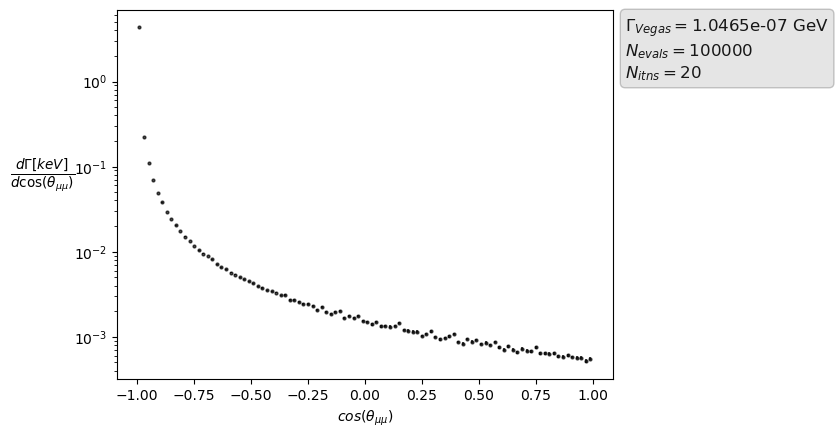

In [33]:
dIs = []
dI_errs = []

cos_s = []
for i in range(0, bins):
    cos_s += [-1 + (i + 0.5) * 2 / bins]
    
for i in range(0, bins):
    dIs += [total_rate['dI_cos_alt'][i].mean]
    dI_errs += [total_rate['dI_cos_alt'][i].sdev]

norm = 2 / bins
keV = 10 ** 6

fig, ax = plt.subplots()

ax.errorbar(cos_s, keV * np.array(dIs) / norm, color = 'black', alpha = 0.7, 
            ls = 'None', markersize = 4, marker = '.', label = 'Vegas', yerr = keV * np.array(dI_errs) / norm)

textstr = '\n'.join((
    r'$\Gamma_{Vegas}=$' +str(round(computed, 11))+ ' GeV',
    r'$N_{evals}=$' +str(nevals)+ '',
    r'$N_{itns}=$' +str(nitns)+ ''))

props = dict(boxstyle='round', facecolor='gray', alpha=0.2)
ax.text(1.025, 0.98, textstr, transform=ax.transAxes, fontsize=12, alpha = 0.9,
        verticalalignment='top', bbox=props)

plt.yscale('log')
plt.ylabel(r'$\frac{d\Gamma[keV]}{d\cos(\theta_{\mu\mu})}$', rotation = '0', fontsize = 14)
ax.yaxis.set_label_coords(-0.15, 0.5)
plt.xlabel(r'$cos(\theta_{\mu\mu})$')
plt.show()

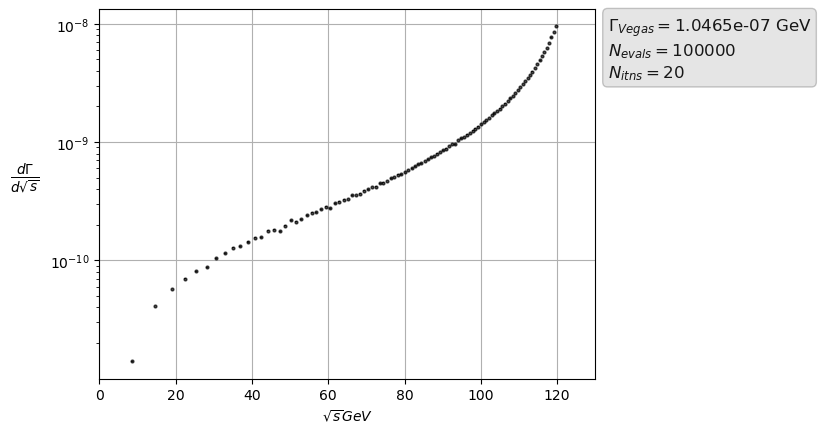

In [35]:
dIs = []
dI_errs = []
sqs = []
ss = []
for i in range(0, bins):
    ss += [s_min_fix + 0.5 * (s_max_fix - s_min_fix) / bins + i * (s_max_fix - s_min_fix) / bins]
    
sbins = []
for i in range(0, bins + 1):
    sbins += [i * (s_max_fix - s_min_fix) / bins]
    
sdbins = []
for i in range(0, bins):
    sdbins += [sbins[i + 1] ** 0.5 - sbins[i] ** 0.5]
    
for i in range(0, bins):
    dIs += [total_rate['dI'][i].mean / sdbins[i]]
    dI_errs += [total_rate['dI'][i].sdev / sdbins[i]]

sqs = np.array(ss) ** 0.5

fig, ax = plt.subplots()

ax.errorbar(sqs, np.array(dIs), color = 'black', alpha = 0.7, 
            ls = 'None', markersize = 4, marker = '.', label = 'Vegas', yerr = np.array(dI_errs))

plt.grid()
textstr = '\n'.join((
    r'$\Gamma_{Vegas}=$' +str(round(computed, 11))+ ' GeV',
    r'$N_{evals}=$' +str(nevals)+ '',
    r'$N_{itns}=$' +str(nitns)+ ''))

props = dict(boxstyle='round', facecolor='gray', alpha=0.2)
ax.text(1.025, 0.98, textstr, transform=ax.transAxes, fontsize=12, alpha = 0.9,
        verticalalignment='top', bbox=props)

plt.yscale('log')

plt.ylabel(r'$\frac{d\Gamma}{d\sqrt{s}}$', rotation = '0', fontsize = 14)
ax.yaxis.set_label_coords(-0.15, 0.5)
plt.xlabel(r'$\sqrt{s} GeV$')
#plt.ylim(10**-10, 10**-6)
plt.xlim(0, 130)
plt.show()

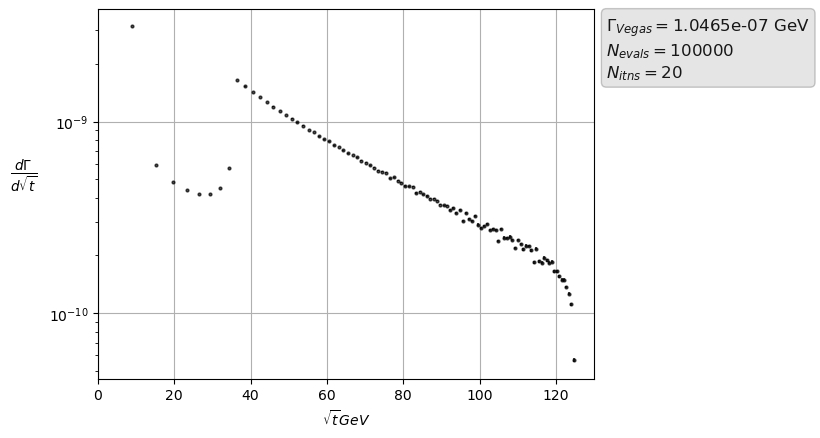

In [36]:
dI_ts = []
dI_terrs = []
sqt = []
ts = []
for i in range(0, bins):
    ts += [t_min_fix + 0.5 * (t_max_fix - t_min_fix) / bins + i * (t_max_fix - t_min_fix) / bins]
    
tbins = []
for i in range(0, bins + 1):
    tbins += [i * (t_max_fix - t_min_fix) / bins]
    
tdbins = []
for i in range(0, bins):
    tdbins += [tbins[i + 1] ** 0.5 - tbins[i] ** 0.5]
    
for i in range(0, bins):
    dI_ts += [total_rate['dI_t'][i].mean / tdbins[i]]
    dI_terrs += [total_rate['dI_t'][i].sdev / tdbins[i]]

sqt = np.array(ts) ** 0.5

fig, ax = plt.subplots()

ax.errorbar(sqt, np.array(dI_ts), color = 'black', alpha = 0.7, 
            ls = 'None', markersize = 4, marker = '.', label = 'Vegas', yerr = np.array(dI_terrs))

plt.grid()
textstr = '\n'.join((
    r'$\Gamma_{Vegas}=$' +str(round(computed, 11))+ ' GeV',
    r'$N_{evals}=$' +str(nevals)+ '',
    r'$N_{itns}=$' +str(nitns)+ ''))

props = dict(boxstyle='round', facecolor='gray', alpha=0.2)
ax.text(1.025, 0.98, textstr, transform=ax.transAxes, fontsize=12, alpha = 0.9,
        verticalalignment='top', bbox=props)

plt.yscale('log')
plt.ylabel(r'$\frac{d\Gamma}{d\sqrt{t}}$', rotation = '0', fontsize = 14)
ax.yaxis.set_label_coords(-0.15, 0.5)
plt.xlabel(r'$\sqrt{t} GeV$')
#plt.ylim(10**-11, 10**-6)
plt.xlim(0, 130)
plt.show()